In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/data_sets/titanic.csv')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [4]:
df['survived'].fillna(1, inplace=True)
df['pclass'].fillna(3, inplace=True)
df['sex'].fillna('male', inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)

In [5]:
df = df[['survived', 'pclass', 'sex', 'age', 'fare']]
df.head()

,survived,pclass,sex,age,fare
0,1.0,1.0,female,29.0000,211.3375
1,1.0,1.0,male,0.9167,151.5500
2,0.0,1.0,female,2.0000,151.5500
3,0.0,1.0,male,30.0000,151.5500
4,0.0,1.0,female,25.0000,151.5500


In [6]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
dtype: int64

In [7]:
# changing categorical column to numerical representation

from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df.sex)

In [9]:
df.head()

,survived,pclass,sex,age,fare
0,1.0,1.0,0,29.0000,211.3375
1,1.0,1.0,1,0.9167,151.5500
2,0.0,1.0,0,2.0000,151.5500
3,0.0,1.0,1,30.0000,151.5500
4,0.0,1.0,0,25.0000,151.5500


In [10]:
# split the data
X = df[['pclass','sex','age','fare']]
y = df['survived']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [13]:
# train the model
from sklearn.tree import DecisionTreeClassifier

In [14]:
dtc = DecisionTreeClassifier(random_state=0, criterion='gini')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
# checking the accuracy on the test set
from sklearn.metrics import accuracy_score

In [16]:
y_prediction = dtc.predict(X_test)
accuracy_score(y_test, y_prediction)

0.7201017811704835

In [17]:
# evaluating the test set
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       248
         1.0       0.62      0.61      0.62       145

    accuracy                           0.72       393
   macro avg       0.70      0.70      0.70       393
weighted avg       0.72      0.72      0.72       393



In [19]:
dtc_matrix = confusion_matrix(y_test, y_prediction)
print(dtc_matrix)

[[195  53]
 [ 57  88]]


<Axes: >

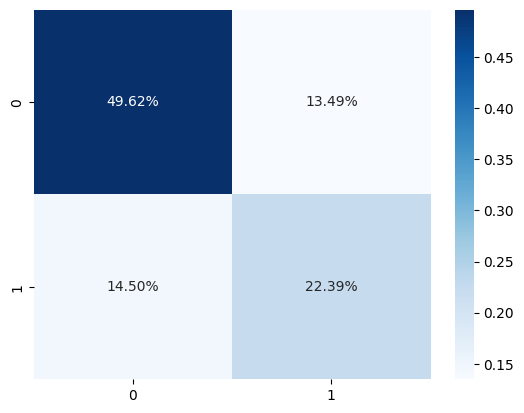

In [20]:
# to visualize the matrix
sns.heatmap(dtc_matrix/np.sum(dtc_matrix), annot = True, fmt='.2%', cmap = 'Blues')

In [21]:
# false positive and true positive rate

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [22]:
dtc_prob = dtc.predict_proba(X_test)[:,1]

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_prob)

In [24]:
auc_score_dtc = auc(fpr, tpr)
auc_score_dtc

0.6990962180200223

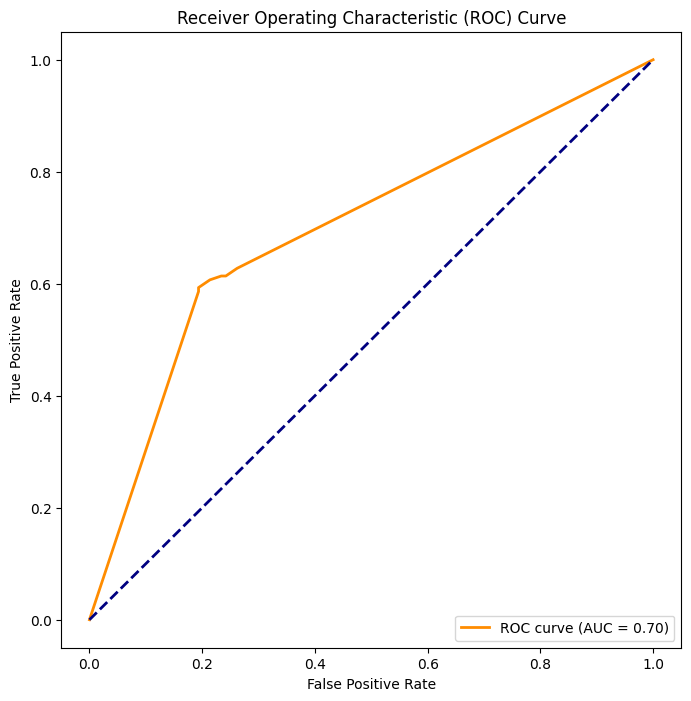

In [25]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score_dtc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Pruning the Decision Tree
Pruning a decision tree involves controlling the size of the tree to prevent overfitting.


In [26]:
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[ 0.00000000e+00 -2.16840434e-19  1.09051254e-04  1.24630005e-04
  1.29822922e-04  1.55787506e-04  1.81752090e-04  2.72628135e-04
  2.72628135e-04  2.80417511e-04  2.90803344e-04  3.08978553e-04
  3.27153762e-04  3.63504180e-04  3.63504180e-04  3.63504180e-04
  3.63504180e-04  3.63504180e-04  3.63504180e-04  3.63504180e-04
  3.96550015e-04  4.24088210e-04  4.36205016e-04  5.40344052e-04
  5.81606688e-04  5.85645624e-04  6.36132316e-04  6.46229654e-04
  6.63731707e-04  6.78541137e-04  6.78541137e-04  7.21815444e-04
  7.27008361e-04  7.27008361e-04  7.27008361e-04  7.27008361e-04
  7.27008361e-04  7.27008361e-04  7.27008361e-04  7.32089602e-04
  7.72446383e-04  7.77238029e-04  8.02617230e-04  8.28492793e-04
  8.30721441e-04  8.40231702e-04  8.41428563e-04  8.48176421e-04
  8.72410033e-04  8.72410033e-04  8.74141005e-04  9.08760451e-04
  9.14472659e-04  9.17021909e-04  9.27643785e-04  9.32062001e-04
  9.69344481e-04  9.96497920e-04  1.00662696e-03  1.00662696e-03
  1.02992851e-03  1.04972

Text(0.5, 1.0, 'Cost Complexity Pruning Path')

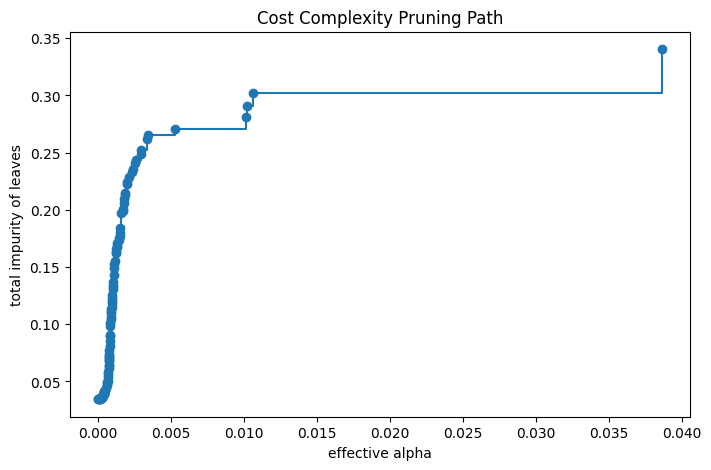

In [29]:
# Set a threshold to ensure non-negative alpha values
ccp_alphas = [max(alpha, 0) for alpha in ccp_alphas]

# Visualizing alpha with respect to impurity of leaves
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Cost Complexity Pruning Path")

In [30]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

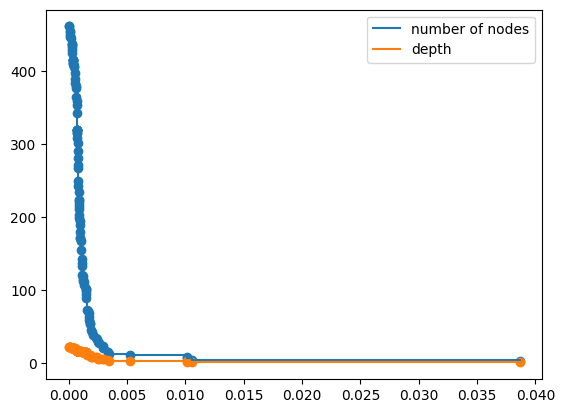

In [31]:
# we can remove the last element in clfs because it is a trivial tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='number of nodes', drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

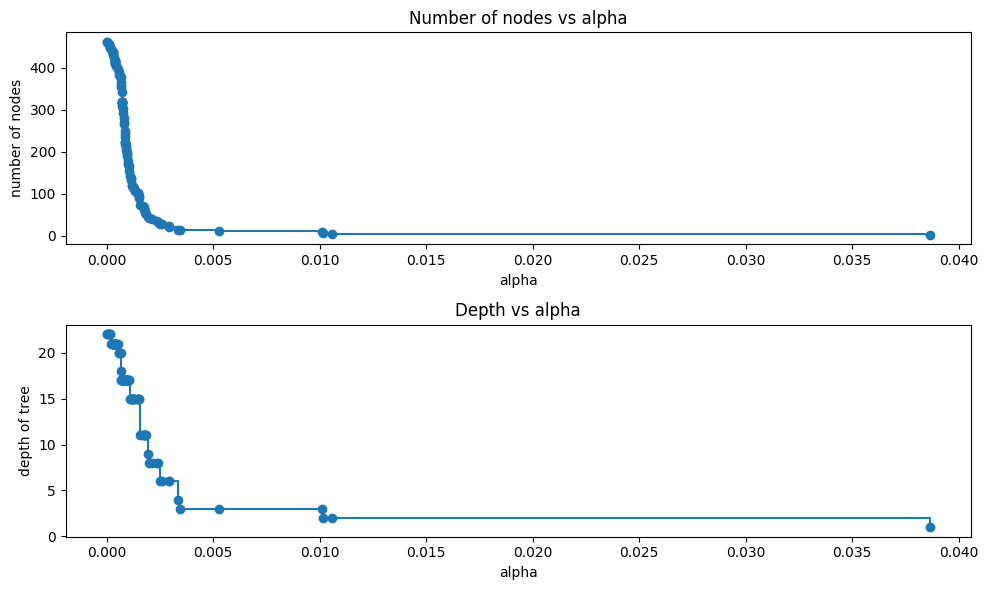

In [34]:
# Another option to plot number of nodes and depth on seperate gaphs
fig, ax = plt.subplots(2,1, figsize=(10,6))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

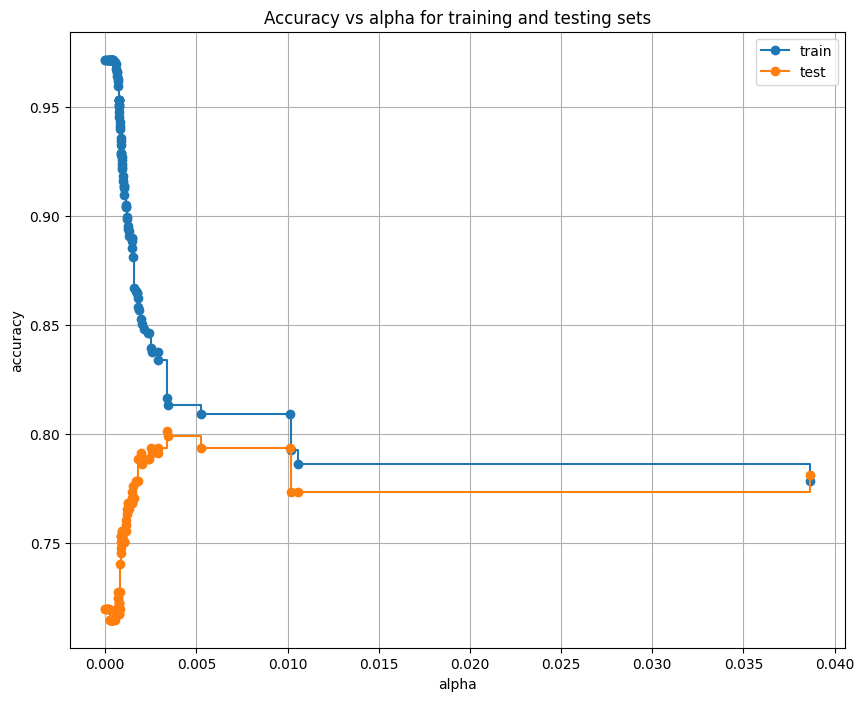

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.grid()
plt.show()

In [35]:
# we can choose a value for alpha, let me choose alpha = 0.018
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.018)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.018, random_state=0)

In [55]:
# check train accuracy
train_pred = clf.predict(X_train)
score = accuracy_score(y_train, train_pred)
print(f'Train Score {score}')

Train Score 0.7862595419847328


In [60]:
# check test accuracy
test_pred = clf.predict(X_test)
score = accuracy_score(y_test, test_pred)
print(f'Test Score {score}')

Test Score 0.7735368956743003


In [56]:
clf_matrix = confusion_matrix(y_train, train_pred)
print(clf_matrix)

[[548  13]
 [183 173]]


In [62]:
clf_matrix = confusion_matrix(y_test, test_pred)
print(clf_matrix)

[[244   4]
 [ 85  60]]


[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.475\nsamples = 917\nvalue = [561, 356]'),
 Text(0.4, 0.5, 'x[0] <= 2.5\ngini = 0.404\nsamples = 349\nvalue = [98, 251]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.13\nsamples = 186\nvalue = [13, 173]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.499\nsamples = 163\nvalue = [85, 78]'),
 Text(0.8, 0.5, 'gini = 0.301\nsamples = 568\nvalue = [463, 105]')]

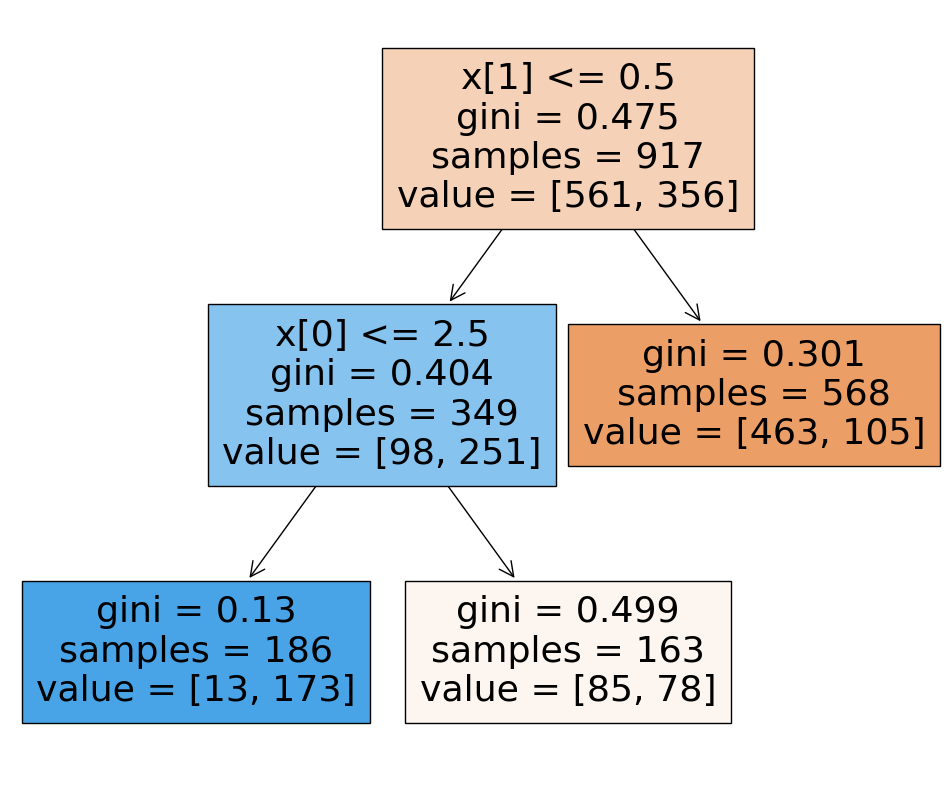

In [41]:
# Visualization of the tree post-pruning 
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, filled=True)

We can see that the size of decision tree significantly got reduced. Also postpruning is much efficient than prepruning.